In [198]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
print(len(X))
print(len(y))

699
699


In [201]:
y.head(2)


,Class
0,2
1,2


In [202]:
df = pd.merge(X, y, left_index=True, right_index=True, how='outer')

In [203]:
df.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [204]:
len(df)

699

In [205]:
df.value_counts('Class')

Class
2    458
4    241
dtype: int64

In [206]:
df['Class'] = df['Class'].apply(lambda x: 1 if x == 4 else 0)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [208]:
bare_null = df[df['Bare_nuclei'].isna() == True]

In [209]:
bare_null

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
23,8,4,5,1,2,NaN,7,3,1,1
40,6,6,6,9,6,NaN,7,8,1,0
139,1,1,1,1,1,NaN,2,1,1,0
145,1,1,3,1,2,NaN,2,1,1,0
158,1,1,2,1,3,NaN,1,1,1,0
164,5,1,1,1,2,NaN,3,1,1,0
235,3,1,4,1,2,NaN,3,1,1,0
249,3,1,1,1,2,NaN,3,1,1,0
275,3,1,3,1,2,NaN,2,1,1,0
292,8,8,8,1,2,NaN,6,10,1,1


In [210]:
random_sample = df.sample(n=20, random_state=42)

In [211]:
random_sample

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
158,1,1,2,1,3,NaN,1,1,1,0
499,4,1,1,1,2,1.0,2,1,1,0
396,3,1,1,1,2,1.0,3,1,1,0
155,5,5,5,6,3,10.0,3,1,1,1
321,3,1,1,1,2,NaN,3,1,1,0
212,1,1,1,1,2,1.0,3,1,1,0
234,3,3,2,1,3,1.0,3,6,1,0
289,5,6,6,8,6,10.0,4,10,4,1
300,8,4,10,5,4,4.0,7,10,1,1
356,5,3,3,1,3,3.0,3,3,3,1


In [212]:
bare_null.value_counts('Class')

Class
0    14
1     2
dtype: int64

In [213]:
df['Bare_nuclei'].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_nuclei, dtype: int64

(array([402.,  30.,  28.,  19.,  30.,   4.,   8.,  21.,   9., 132.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

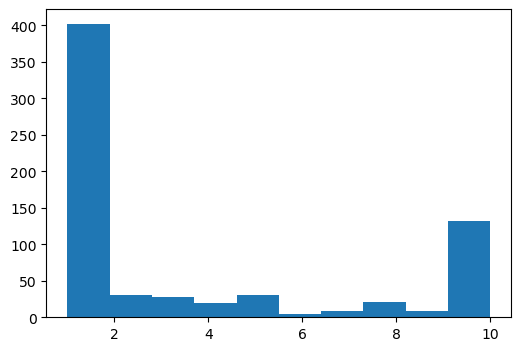

In [214]:
plt.figure(figsize=(6,4))
plt.hist(df['Bare_nuclei'])

In [215]:
bare_ = df[(df['Bare_nuclei'] == 1) | (df['Bare_nuclei'] == 10)]

<Axes: xlabel='Bare_nuclei', ylabel='count'>

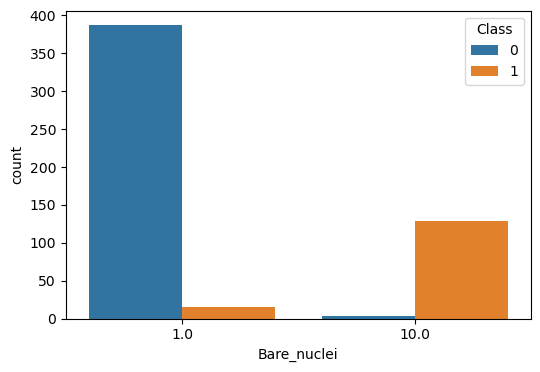

In [216]:
plt.figure(figsize=(6,4))
sns.countplot(data=bare_, x ='Bare_nuclei', hue = 'Class')

In [217]:
df.loc[(df['Class'] == 2) & (df['Bare_nuclei'].isna()), 'Bare_nuclei'] = 1
df.loc[(df['Class'] != 2) & (df['Bare_nuclei'].isna()), 'Bare_nuclei'] = 10

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  699 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


<Axes: xlabel='Class', ylabel='count'>

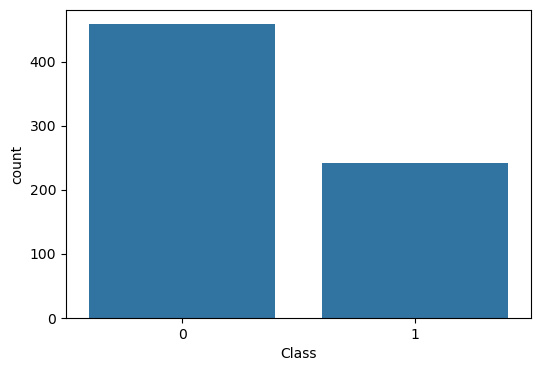

In [219]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x = 'Class')

<Axes: xlabel='Clump_thickness'>

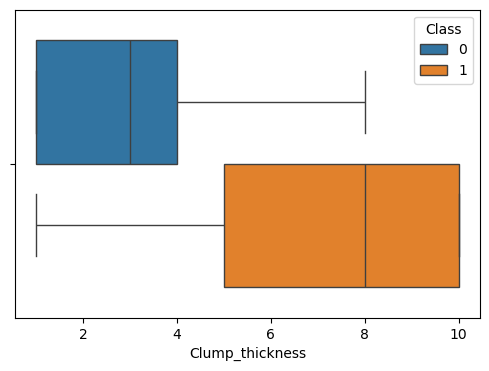

In [220]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Clump_thickness', hue='Class')

<Axes: xlabel='Single_epithelial_cell_size'>

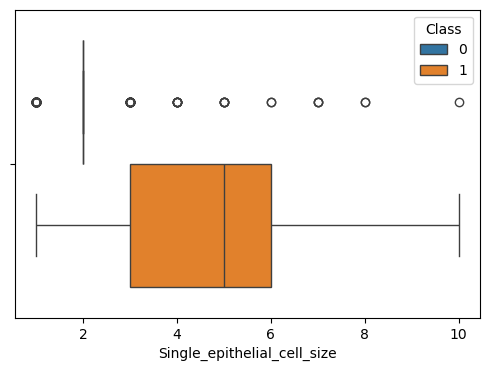

In [221]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Single_epithelial_cell_size', hue='Class')

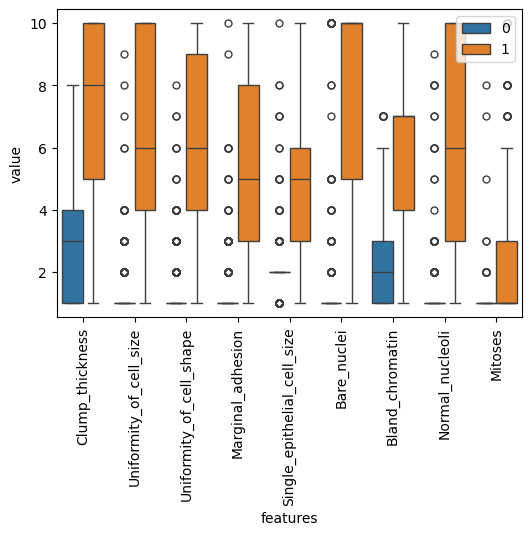

In [227]:
melted_df = pd.melt(df, value_vars=df[df.columns[:-1]], id_vars='Class', 
                    var_name='features', value_name='value')

plt.figure(figsize=(6,4))
sns.boxplot(x='features', y='value', hue="Class", data=melted_df,fliersize=5)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [228]:
df.corr()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.552554,0.558428,0.535835,0.350034,0.716001
Uniformity_of_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.654290,0.755721,0.722865,0.458693,0.817904
Uniformity_of_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.680941,0.735948,0.719446,0.438911,0.818934
Marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.628526,0.666715,0.603352,0.417633,0.696800
Single_epithelial_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.547466,0.616102,0.628881,0.479101,0.682785
Bare_nuclei,0.552554,0.654290,0.680941,0.628526,0.547466,1.000000,0.647730,0.556131,0.313539,0.769854
Bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.647730,1.000000,0.665878,0.344169,0.756616
Normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.556131,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.313539,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.769854,0.756616,0.712244,0.423170,1.000000


<Axes: >

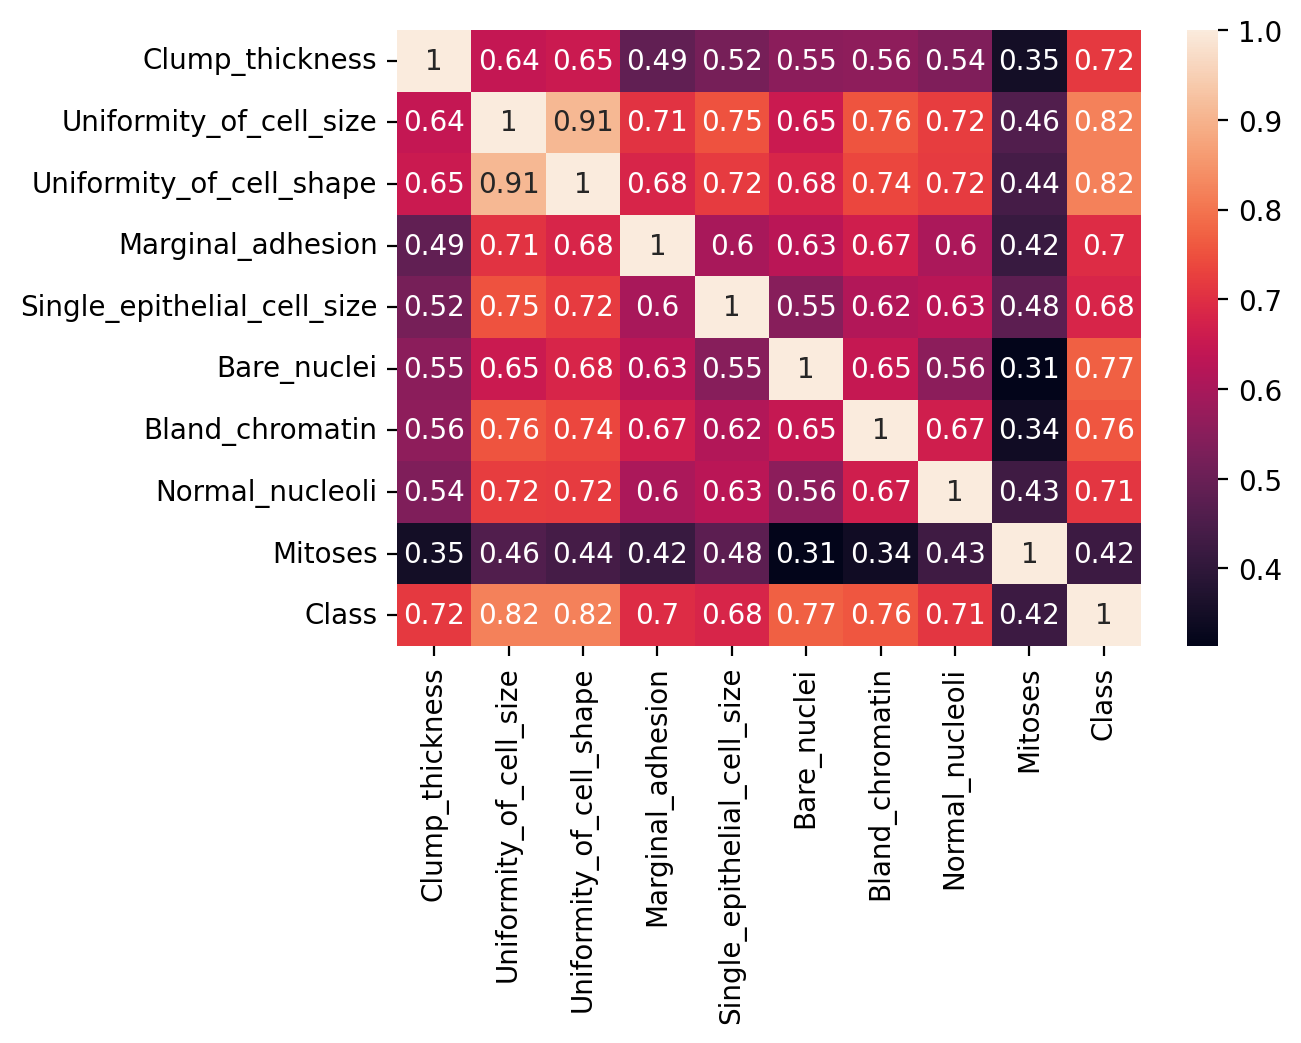

In [250]:
plt.figure(figsize=(6,4), dpi = 200)
sns.heatmap(df.corr(), annot = True)

In [230]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## KNearestNeighbors

In [233]:
from sklearn.neighbors import KNeighborsClassifier

In [234]:
knn = KNeighborsClassifier()

In [235]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [236]:
from sklearn.model_selection import GridSearchCV

In [237]:
k_values = list(range(1,30))

In [238]:
weights = ['uniform', 'distance']

In [239]:
leaf_size = [10,20,30]

In [240]:
param_grid = {'n_neighbors':k_values, 'weights': weights, 'leaf_size': leaf_size}

In [241]:
full_cv_classifier = GridSearchCV(knn,param_grid,cv=5,scoring='accuracy')

In [242]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [243]:
full_cv_classifier.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}

In [245]:
y_pred = full_cv_classifier.predict(X_test)

In [246]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [247]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.94      0.97        33

    accuracy                           0.98       105
   macro avg       0.99      0.97      0.98       105
weighted avg       0.98      0.98      0.98       105



In [248]:
confusion_matrix(y_test,pred)

array([[72,  0],
       [ 3, 30]], dtype=int64)

In [265]:
accuracy_score(y_test,y_pred)

0.9809523809523809

## LogisticRegression

In [251]:
from sklearn.linear_model import LogisticRegressionCV 

In [252]:
log_model = LogisticRegressionCV()

In [253]:
log_model.fit(X_train,y_train)

LogisticRegressionCV()

In [254]:
log_model.C_

array([0.04641589])

In [255]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [256]:
log_model.coef_

array([[0.41543408, 0.10554364, 0.27596846, 0.20533963, 0.12713386,
        0.27546227, 0.32867429, 0.087078  , 0.19388163]])

In [263]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [259]:
y_logpred = log_model.predict(X_test)

In [260]:
confusion_matrix(y_test,y_logpred)

array([[72,  0],
       [ 2, 31]], dtype=int64)

In [262]:
print(classification_report(y_test,y_logpred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.94      0.97        33

    accuracy                           0.98       105
   macro avg       0.99      0.97      0.98       105
weighted avg       0.98      0.98      0.98       105



In [264]:
accuracy_score(y_test,y_logpred)

0.9809523809523809

In [268]:
from sklearn.linear_model import LogisticRegression

In [269]:
from sklearn.model_selection import GridSearchCV

In [270]:
log_model2 = LogisticRegression(solver='liblinear', class_weight ='balanced')

In [271]:
penalty = ['l1', 'l2']
max_iter = [100,500,1000]
C = np.logspace(0, 4, 10)

In [272]:
param_grid2 = {'C':C,'penalty':penalty,'max_iter':max_iter}

In [273]:
grid_log = GridSearchCV(log_model2,param_grid2)

In [274]:
grid_log.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2']})

In [276]:
grid_log.best_params_

{'C': 2.7825594022071245, 'max_iter': 100, 'penalty': 'l1'}

In [277]:
y_logpred2 = grid_log.predict(X_test)

In [278]:
confusion_matrix(y_test,y_logpred2)

array([[72,  0],
       [ 2, 31]], dtype=int64)

In [279]:
accuracy_score(y_test,y_logpred2)

0.9809523809523809